### Importa as bibliotecas

In [69]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter("ignore")

##### Exibe a versão do Panda

In [70]:
pd.__version__

'1.3.4'

##### Carrega o Arquivo 

In [71]:
df = pd.read_excel('movimentacao-2021-12-19-02-00-08.xlsx', sheet_name="Movimentação")

##### Exibe as linhas do arquivo

In [72]:
df.head()

,Entrada/Saída,Data,Movimentação,Produto,Instituição,Quantidade,Preço unitário,Valor da Operação
0,Credito,16/12/2021,Transferência - Liquidação,BTCR11 - FII BTG CRI,CLEAR CORRETORA - GRUPO XP,3,89.99,269.97
1,Credito,15/12/2021,Transferência - Liquidação,CSAN3 - COSAN S.A.,CLEAR CORRETORA - GRUPO XP,10,22.37,223.7
2,Credito,14/12/2021,Rendimento,BCFF11 - FDO INV IMOB - FII BTG PACTUAL ...,CLEAR CORRETORA - GRUPO XP,12,0.5,6
3,Credito,14/12/2021,Rendimento,BRCR11 - FDO INV IMOB - FII BTG PACTUAL ...,CLEAR CORRETORA - GRUPO XP,2,0.5,1
4,Credito,14/12/2021,Rendimento,BTCR11 - FII BTG CRI,CLEAR CORRETORA - GRUPO XP,17,0.9,15.3


##### Exibe as Colunas do Arquivo

In [73]:
df.columns

Index(['Entrada/Saída', 'Data', 'Movimentação', 'Produto', 'Instituição',
       'Quantidade', 'Preço unitário', 'Valor da Operação'],
      dtype='object')

##### Exibe os tipos de cada coluna 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entrada/Saída      214 non-null    object
 1   Data               214 non-null    object
 2   Movimentação       214 non-null    object
 3   Produto            214 non-null    object
 4   Instituição        214 non-null    object
 5   Quantidade         214 non-null    int64 
 6   Preço unitário     214 non-null    object
 7   Valor da Operação  214 non-null    object
dtypes: int64(1), object(7)
memory usage: 13.5+ KB


##### Trata os dados das colunas ('Preço unitário', 'Valor da Operação', 'Produto')

In [75]:
df['Preço unitário'] = df['Preço unitário'].apply(lambda x : str(x).replace("-", "0"))
df['Valor da Operação'] = df['Valor da Operação'].apply(lambda x : str(x).replace("-", "0"))
df["Produto"] = df["Produto"].str.split("-").str.get(0).str.strip()

##### Converte as colunas ('Preço unitário', 'Valor da Operação') para o float

In [76]:
df['Preço unitário'] =df['Preço unitário'].astype('float64')
df['Valor da Operação'] =df['Valor da Operação'].astype('float64')

##### Converte a coluna ('Data') para o tipo Date

In [77]:
# df['Data'] = pd.to_datetime(df['Data'],format='%d%m%Y')
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True)
df['Data']

0     2021-12-16
1     2021-12-15
2     2021-12-14
3     2021-12-14
4     2021-12-14
5     2021-12-14
6     2021-12-14
7     2021-12-10
8     2021-12-10
9     2021-12-10
10    2021-12-02
11    2021-12-02
12    2021-12-01
13    2021-12-01
14    2021-11-30
15    2021-11-29
16    2021-11-26
17    2021-11-24
18    2021-11-22
19    2021-11-18
20    2021-11-16
21    2021-11-16
22    2021-11-16
23    2021-11-16
24    2021-11-16
25    2021-11-12
26    2021-11-12
27    2021-11-12
28    2021-11-12
29    2021-10-26
         ...    
184   2021-02-02
185   2021-02-01
186   2021-02-01
187   2021-02-01
188   2021-02-01
189   2021-01-29
190   2021-01-29
191   2021-01-29
192   2021-01-29
193   2021-01-29
194   2021-01-22
195   2021-01-22
196   2021-01-22
197   2021-01-22
198   2021-01-22
199   2021-01-22
200   2021-01-20
201   2021-01-20
202   2021-01-19
203   2021-01-19
204   2021-01-18
205   2021-01-15
206   2021-01-15
207   2021-01-15
208   2021-01-15
209   2021-01-15
210   2021-01-15
211   2021-01-

##### Count

In [78]:
df.count()

Entrada/Saída        214
Data                 214
Movimentação         214
Produto              214
Instituição          214
Quantidade           214
Preço unitário       214
Valor da Operação    214
dtype: int64

##### Discribe

In [79]:
df.describe()

,Quantidade,Preço unitário,Valor da Operação
count,214.000000,214.000000,214.000000
mean,10.728972,21.682804,139.256495
std,14.538968,29.210406,165.097887
min,0.000000,0.000000,0.000000
25%,3.000000,0.460000,1.635000
50%,7.500000,10.035000,70.500000
75%,12.000000,29.780000,261.905000
max,109.000000,114.370000,789.750000


##### Remove a coluna "Instituição" e exibe 

In [80]:
df.drop(['Instituição'], axis=1, inplace=True)

##### Agrupa por tipo de movimentação

In [81]:
df_sum_Movimentacao = df.groupby(["Movimentação"]).sum()  
df_sum_Movimentacao

,Quantidade,Preço unitário,Valor da Operação
Movimentação,,,
Desdobro,27,0.00,0.00
Direito de Subscrição,3,0.00,0.00
Direitos de Subscrição - Não Exercido,0,0.00,0.00
Dividendo,58,0.79,12.02
Juros Sobre Capital Próprio,348,2.42,38.12
Rendimento,406,27.15,192.93
Transferência - Liquidação,1454,4609.76,29557.82


##### Filtra as inforamções da coluna movimentações


In [82]:
tipos_movimentacoes = ['Juros Sobre Capital Próprio','Rendimento', 'Dividendo']
df_filter_movimentacao = df[df['Movimentação'].isin(tipos_movimentacoes)]
print(df_filter_movimentacao.sum());

Entrada/Saída        CreditoCreditoCreditoCreditoCreditoCreditoCred...
Movimentação         RendimentoRendimentoRendimentoRendimentoRendim...
Produto              BCFF11BRCR11BTCR11MXRF11SADI11BBAS3CIEL3WTSP11...
Quantidade                                                         812
Preço unitário                                                   30.36
Valor da Operação                                               243.07
dtype: object


## 

##### Groupby mes - Exibir valor de rendimentos mensal

In [83]:
colunas_exibir = ['Data', 'Quantidade', 'Valor da Operação']
df_filter_movimentacao.groupby([df['Data'].dt.year.rename('Ano'), df['Data'].dt.month.rename('Mes')])[colunas_exibir].sum()  


Quantidade  Valor da Operação
Ano  Mes                               
2021 1            28              13.57
     2            78              16.42
     3            53              21.70
     4            38              16.95
     5            51              16.17
     6            46              17.65
     7            28              14.73
     8           168              30.88
     9            61              21.16
     10           28              16.06
     11          183              32.94
     12           50              24.84

##### Agrupa Rendimento por  Período e Produto

In [84]:
df_por_produto = df_filter_movimentacao.groupby([df['Data'].dt.year.rename('Ano'), df['Data'].dt.month.rename('Mes'), df['Produto']]).sum()  
pd.set_option("min_rows", 76)
df_por_produto.head(76)

Quantidade  Preço unitário  Valor da Operação
Ano  Mes Produto                                               
2021 1   BCFF11           12            0.53               6.36
         BRCR11            2            0.50               1.00
         BTCR11           10            0.55               5.54
         SADI11            2            0.21               0.42
         WTSP11B           2            0.13               0.25
     2   BCFF11           12            0.56               6.72
         BRCR11            2            0.49               0.98
         BTCR11           10            0.57               5.70
         CIEL3            50            0.06               2.38
         SADI11            2            0.20               0.40
         WTSP11B           2            0.12               0.24
     3   BBAS3             8            0.58               1.98
         BCFF11           12            0.56               6.72
         BRCR11            2            0.48               0.96
         BTCR11           10            0.60               6.00
         LAME4             3            0.21               0.55
         SADI11            2            0.19               0.38
         WEGE3            14            0.35               4.89
         WTSP11B           2            0.11               0.22
     4   BCFF11           12            0.56               6.72
         BRCR11            2            0.46               0.92
         BTCR11           10            0.65               6.50
         JHSF3            10            0.21               2.10
         SADI11            2            0.19               0.38
         WTSP11B           2            0.17               0.33
     5   BBAS3             8            0.41               1.45
         BCFF11           12            0.50               6.00
         BRCR11            2            0.46               0.92
         BTCR11           10            0.67               6.70
         CIEL3             5            0.03               0.13
...                      ...             ...                ...
     8   BCFF11           12            0.47               5.64
         BRCR11            2            0.46               0.92
         BTCR11           10            0.75               7.50
         SADI11            2            0.41               0.82
         WEGE3            74            0.21               5.66
         WTSP11B           2            0.29               0.58
     9   BBAS3            33            0.18               5.18
         BCFF11           12            0.50               6.00
         BRCR11            2            0.46               0.92
         BTCR11           10            0.75               7.50
         SADI11            2            0.43               0.86
         WTSP11B           2            0.35               0.70
     10  BCFF11           12            0.50               6.00
         BRCR11            2            0.46               0.92
         BTCR11           10            0.75               7.50
         SADI11            2            0.46               0.92
         WTSP11B           2            0.36               0.72
     11  BBAS3            33            0.39              11.05
         BCFF11           12            0.50               6.00
         BRCR11            2            0.46               0.92
         BTCR11           12            0.80               9.60
         CIEL3           109            0.03               2.56
         MXRF11           11            0.09               0.99
         SADI11            2            0.51               1.02
         WTSP11B           2            0.40               0.80
     12  BCFF11           12            0.50               6.00
         BRCR11            2            0.50               1.00
         BTCR11           17            0.90              15.30
         MXRF11           17            0.08               1.36
         SADI11            2            0.59      

##### Valor da operação Agrupapado por produto

In [85]:
df_por_produto = df_filter_movimentacao.groupby([df['Produto']])['Produto','Valor da Operação'].sum()
df_por_produto

,Valor da Operação
Produto,
BBAS3,31.71
BCFF11,73.56
BRCR11,11.30
BTCR11,92.11
CIEL3,5.07
JHSF3,2.10
LAME4,0.55
MGLU3,0.23
MXRF11,2.35


##### Gráfico - Rendimentos Agrupapado por produto

<BarContainer object of 12 artists>

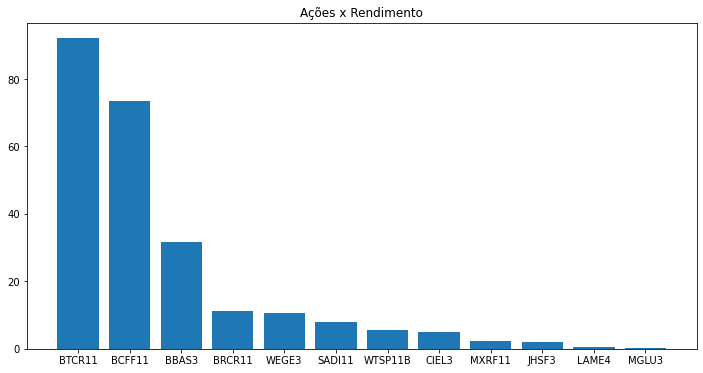

In [127]:
df_por_produto = df_por_produto.sort_values(['Valor da Operação'], ascending=False)

eixoX = df_por_produto.index
eixoY = df_por_produto['Valor da Operação']

plt.figure(figsize=(12,6))
plt.title('Ações x Rendimento')
plt.bar(eixoX, eixoY)
